In [214]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt

In [63]:
# Access Disaster Declaation Summary Data from FEMA
url = "https://www.fema.gov/api/open/v2/DisasterDeclarationsSummaries"

disasterDeclarationSummaries=requests.get(url,params)
disasterDeclarationSummariesJson = disasterDeclarationSummaries.json()

In [64]:
#Print data in JSON format to inspect. There are 25 attributes
print(json.dumps(disasterDeclarationSummariesJson,indent=4))

{
    "metadata": {
        "skip": 0,
        "filter": "",
        "orderby": "",
        "select": null,
        "rundate": "2024-05-09T14:13:30.759Z",
        "top": 1000,
        "format": "json",
        "metadata": true,
        "entityname": "DisasterDeclarationsSummaries",
        "version": "v2",
        "url": "/api/open/v2/DisasterDeclarationsSummaries",
        "count": 0
    },
    "DisasterDeclarationsSummaries": [
        {
            "femaDeclarationString": "FM-5464-RI",
            "disasterNumber": 5464,
            "state": "RI",
            "declarationType": "FM",
            "declarationDate": "2023-04-14T00:00:00.000Z",
            "fyDeclared": 2023,
            "incidentType": "Fire",
            "declarationTitle": "QUEENS RIVER FIRE",
            "ihProgramDeclared": false,
            "iaProgramDeclared": false,
            "paProgramDeclared": true,
            "hmProgramDeclared": true,
            "incidentBeginDate": "2023-04-14T00:00:00.000Z",
      

In [67]:
# Total number of records - 1000
disasterList = disasterDeclarationSummariesJson['DisasterDeclarationsSummaries']
len(disasterList)

1000

In [127]:
# Except Disaster closing date and lastIAFilingDate , rest of the attributes quality is good
disasterDF=pd.DataFrame(disasterList)
print('Disaster Summary Data Frame Details ')
print('Size  # ', disasterDF.shape)
print(' Columns # ',disasterDF.columns)
disasterDF.info()

Disaster Summary Data Frame Details 
Size  #  (1000, 25)
 Columns #  Index(['femaDeclarationString', 'disasterNumber', 'state', 'declarationType',
       'declarationDate', 'fyDeclared', 'incidentType', 'declarationTitle',
       'ihProgramDeclared', 'iaProgramDeclared', 'paProgramDeclared',
       'hmProgramDeclared', 'incidentBeginDate', 'incidentEndDate',
       'disasterCloseoutDate', 'tribalRequest', 'fipsStateCode',
       'fipsCountyCode', 'placeCode', 'designatedArea',
       'declarationRequestNumber', 'lastIAFilingDate', 'lastRefresh', 'hash',
       'id'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   femaDeclarationString     1000 non-null   object
 1   disasterNumber            1000 non-null   int64 
 2   state                     1000 non-null   object
 3   declarationType        

In [128]:
# Unique list of States in the dataset.
disasterDF['state'].unique()

array(['RI', 'KS', 'CO', 'GA', 'TX', 'OR', 'FL', 'CA', 'SD', 'WA', 'UT',
       'ID', 'HI', 'MT', 'NM', 'NV', 'WY', 'AZ', 'OK', 'AK', 'VT', 'NC',
       'TN', 'KY', 'NH', 'IL', 'NE', 'AL', 'IN', 'AR', 'MS', 'ME', 'NY',
       'ND', 'WV', 'SC'], dtype=object)

In [91]:
disasterDF.loc[disasterDF['state']=='NC']

,femaDeclarationString,disasterNumber,state,declarationType,declarationDate,fyDeclared,incidentType,declarationTitle,ihProgramDeclared,iaProgramDeclared,...,tribalRequest,fipsStateCode,fipsCountyCode,placeCode,designatedArea,declarationRequestNumber,lastIAFilingDate,lastRefresh,hash,id
295,FM-5161-NC,5161,NC,FM,2016-11-11T00:00:00.000Z,2017,Fire,PARTY ROCK FIRE,False,False,...,False,37,021,99021,Buncombe (County),16116,None,2023-05-22T03:41:22.800Z,bc82ca44b539ac0ff1aae4c261177dc17691a730,0de2e68c-c587-49a7-b92f-21bf3781b6a5
296,FM-5161-NC,5161,NC,FM,2016-11-11T00:00:00.000Z,2017,Fire,PARTY ROCK FIRE,False,False,...,False,37,089,99089,Henderson (County),16116,None,2023-05-22T03:41:22.800Z,426e3bb084296359c20348251de0fcdda1fc15bf,b735373b-37db-4294-85aa-c93aa2e0b9e5
297,FM-5161-NC,5161,NC,FM,2016-11-11T00:00:00.000Z,2017,Fire,PARTY ROCK FIRE,False,False,...,False,37,161,99161,Rutherford (County),16116,None,2023-05-22T03:41:22.800Z,bfe7bef8f288e8e1dce4a863bca7130059a252b7,0e890086-05bf-4688-8048-a66b8aadc06e


In [100]:
# Another view - Disaster count by state.
disasterDF.groupby('state')['disasterNumber'].count()

state
AK      5
AL     23
AR     16
AZ     19
CA    179
CO     13
FL     72
GA     22
HI      9
ID     14
IL     21
IN      4
KS     14
KY    111
ME      6
MS      7
MT     37
NC      3
ND      7
NE      3
NH      5
NM      7
NV     24
NY      5
OK     17
OR     49
RI      1
SC     46
SD     24
TN     73
TX     36
UT     16
VT     24
WA     78
WV      2
WY      8
Name: disasterNumber, dtype: int64

In [104]:
print(disasterDF.groupby('declarationDate')['disasterNumber'].count())

declarationDate
2012-08-03T00:00:00.000Z     2
2012-08-04T00:00:00.000Z     3
2012-08-13T00:00:00.000Z     1
2012-08-14T00:00:00.000Z     1
2012-08-15T00:00:00.000Z     1
                            ..
2023-08-15T00:00:00.000Z    20
2023-08-25T00:00:00.000Z     4
2023-09-07T00:00:00.000Z     6
2023-10-06T00:00:00.000Z     1
2023-10-11T00:00:00.000Z    10
Name: disasterNumber, Length: 314, dtype: int64


In [129]:
# PIVOT Table that shows the Date/State and Count 
disasterPivot = pd.pivot_table(disasterDF,values=['disasterNumber'],index=['declarationDate','state'],aggfunc={'disasterNumber':'count'})
disasterPivot.shape
display(disasterPivot.head(200))
display(disasterPivot.sort_values('declarationDate',ascending=False))
disasterPivot.sort_values('disasterNumber',ascending=False)

disasterNumber
declarationDate          state                
2012-08-03T00:00:00.000Z OK                  2
2012-08-04T00:00:00.000Z OK                  3
2012-08-13T00:00:00.000Z CA                  1
2012-08-14T00:00:00.000Z WA                  1
2012-08-15T00:00:00.000Z ID                  1
...                                        ...
2018-08-12T00:00:00.000Z SD                  1
                         WA                  2
2018-08-13T00:00:00.000Z WA                  1
2018-08-22T00:00:00.000Z HI                  4
2018-08-24T00:00:00.000Z OR                  1

[200 rows x 1 columns]

,,disasterNumber
declarationDate,state,
2023-10-11T00:00:00.000Z,MT,10
2023-10-06T00:00:00.000Z,VT,1
2023-09-07T00:00:00.000Z,GA,6
2023-08-25T00:00:00.000Z,CO,4
2023-08-15T00:00:00.000Z,IL,20
...,...,...
2012-08-15T00:00:00.000Z,ID,1
2012-08-14T00:00:00.000Z,WA,1
2012-08-13T00:00:00.000Z,CA,1


,,disasterNumber
declarationDate,state,
2023-04-10T00:00:00.000Z,KY,88
2022-12-13T00:00:00.000Z,FL,63
2022-11-21T00:00:00.000Z,SC,46
2023-05-17T00:00:00.000Z,TN,45
2023-01-14T00:00:00.000Z,CA,43
...,...,...
2018-08-04T00:00:00.000Z,WA,1
2018-08-06T00:00:00.000Z,UT,1
2018-08-09T00:00:00.000Z,CA,1


<Axes: xlabel='state'>

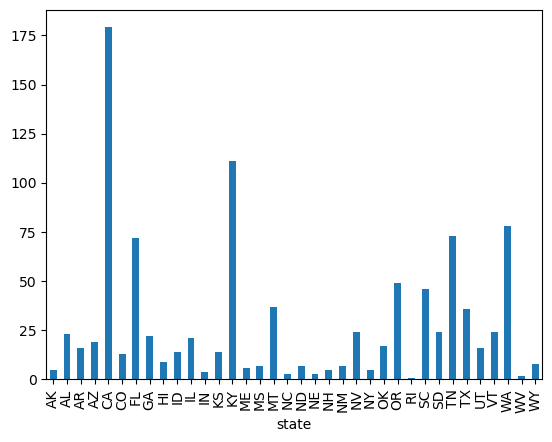

In [157]:
disasterDF.groupby('state')['disasterNumber'].count().plot(kind='bar')
# TO DO 
# Horizontal Bar Graph is preferred.
# Square Acerage / Population

#disasterDF.plot(kind='bar',title="Disaster Dataframe by State and Year",x='declarationDate') #,y='declarationDate',figsize=(100,100))

[2023 2022 2021 2020 2019 2018 2017 2016 2015 2014 2013 2012]


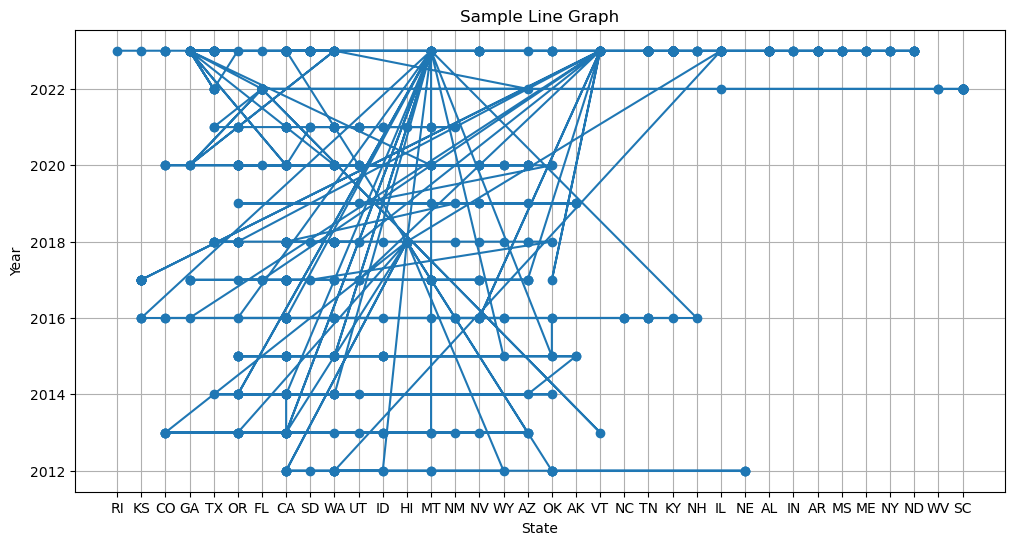

In [220]:
#disasterDF.plot(kind='scatter',x='state',y='declarationDate',subplots=True,figsize=(200,300))

#disasterDF['year']=

disasterDF['Date'] = pd.to_datetime(disasterDF['declarationDate'])
disasterDF['Year']= disasterDF['Date'].dt.year

print(disasterDF['Year'].unique())

#disasterDF.plot(x='state',y='Year',kind='scatter',figsize=(75,25))

plt.figure(figsize=(12, 6))
plt.plot(disasterDF['state'], disasterDF['Year'], marker='o', linestyle='-')
plt.title('Sample Line Graph')
plt.xlabel('State')
plt.ylabel('Year')
plt.grid(True)
plt.show()

# Seaborn Charts

# Area , Population , Disasters , Economic Elements & Health

In [168]:
import datetime as dt

disasterDF.set_index(disasterDF['declarationDate'])

disasterDF

,femaDeclarationString,disasterNumber,state,declarationType,declarationDate,fyDeclared,incidentType,declarationTitle,ihProgramDeclared,iaProgramDeclared,...,tribalRequest,fipsStateCode,fipsCountyCode,placeCode,designatedArea,declarationRequestNumber,lastIAFilingDate,lastRefresh,hash,id
0,FM-5464-RI,5464,RI,FM,2023-04-14T00:00:00.000Z,2023,Fire,QUEENS RIVER FIRE,False,False,...,False,44,009,99009,"Washington (County)(in (P)MSA 5520,6480)",23042,None,2023-05-22T03:41:22.800Z,1111d4d4a33f8a6e4d383ac5bd0e60b9bf142da0,9b9a9d9c-8b03-4049-9b16-a3c0d581556c
1,FM-5463-KS,5463,KS,FM,2023-04-13T00:00:00.000Z,2023,Fire,HADDAM FIRE,False,False,...,False,20,201,99201,Washington (County),23038,None,2023-05-22T03:41:22.800Z,78dd55a181f146622eb65835b5d794689d1ea7f2,57d936ce-a0d7-412a-9d78-18aee530c146
2,DR-4731-CO,4731,CO,DR,2023-08-25T00:00:00.000Z,2023,Flood,"SEVERE STORMS, FLOODING, AND TORNADOES",False,False,...,False,08,009,99009,Baca (County),23081,None,2023-10-02T19:21:20.859Z,44d903d3d79b5295f58aefdd35682a8d3011644d,fe1befa2-d7ac-4400-b430-36bf30ac9a15
3,DR-4731-CO,4731,CO,DR,2023-08-25T00:00:00.000Z,2023,Flood,"SEVERE STORMS, FLOODING, AND TORNADOES",False,False,...,False,08,061,99061,Kiowa (County),23081,None,2023-10-02T19:21:20.859Z,ecfd4777766336e18a46d1eb231fc25922f8b014,880f5941-94fb-4c00-afb8-2f1e32fe1b5b
4,DR-4731-CO,4731,CO,DR,2023-08-25T00:00:00.000Z,2023,Flood,"SEVERE STORMS, FLOODING, AND TORNADOES",False,False,...,False,08,099,99099,Prowers (County),23081,None,2023-10-02T19:21:20.859Z,90ab966409613986143ee242870748e8d19aa525,875a66ca-6234-423a-9e92-3626484e11d6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,DR-4677-SC,4677,SC,DR,2022-11-21T00:00:00.000Z,2023,Hurricane,HURRICANE IAN,True,False,...,False,45,019,99019,Charleston (County),22099,2023-01-23T00:00:00.000Z,2023-05-22T03:41:22.800Z,58363b9acd7b07ec92aa22e6f389aaddc35ca716,99a9781e-6dc8-4e55-a668-12269794634d
996,DR-4677-SC,4677,SC,DR,2022-11-21T00:00:00.000Z,2023,Hurricane,HURRICANE IAN,True,False,...,False,45,043,99043,Georgetown (County),22099,2023-01-23T00:00:00.000Z,2023-05-22T03:41:22.800Z,c42c31a947ffe96538ead00b876e0743707efe2d,203ee138-3194-48f4-9f9b-eda5daa1dfd3
997,DR-4677-SC,4677,SC,DR,2022-11-21T00:00:00.000Z,2023,Hurricane,HURRICANE IAN,True,False,...,False,45,051,99051,Horry (County),22099,2023-01-23T00:00:00.000Z,2023-05-22T03:41:22.800Z,1b6d023ef635f13dd520b435545dd8b4711882f8,eada1bcd-afc9-455d-93ed-c7ecea813c67
998,DR-4676-IL,4676,IL,DR,2022-10-14T00:00:00.000Z,2023,Flood,SEVERE STORM AND FLOODING,True,False,...,False,17,163,99163,St. Clair (County),22074,2022-12-22T00:00:00.000Z,2023-05-22T03:41:22.800Z,0fe6be2cf7318d17c5f41b426c5746ae21cfbb03,20e8223a-ec2f-4096-8eb2-d2f57a4a4acf
